In [2]:
%matplotlib ipympl

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Polygon
from rhealpixdggs.dggs import *
from pyproj import Transformer
from shapely.ops import transform
import rasterio
import time
import sys
import os
import matplotlib.pyplot as plt
sys.path.append('..')
from rhealpix_helper import *
from shapely.geometry import Polygon, Point, box
from pandas.core.common import flatten
from math import radians, sin, cos, asin, sqrt

In [2]:
raster = os.path.dirname(os.getcwd()) + r"/data/eesti_clipped/small_extent/MeritDEM90m.tif"

In [3]:
rdggs = WGS84_003

In [17]:
rdggs.cell_area(9)

258797.76454982837

In [5]:
%time rhpix_el_11 = raster_to_rhpix(raster,'elevation',8,12,[26.521263, 58.283163, 26.900083, 58.505180],0.1)

Raster pixel size 92.6624388709314
9
Start filling raster extent with rhealpix indexes at resolution 9
Start getting raster values for cells at resolution 9
Wall time: 8.9 s


In [63]:
%time h3_df = raster_to_h3(raster,'elevation',8,13,[26.521263, 58.283163, 26.900083, 58.505180],3)

Raster pixel size 92.6624388709314
11
Start filling raster extent with h3 indexes at resolution 11
Start getting raster values for hexes at resolution 11
Wall time: 6.51 s


In [61]:
%time rhpix_el_11['cell_id'][0].centroid(plane=False)

Wall time: 1.03 ms


(58.2830361225423, 26.899544350032226)

In [57]:
%time h3.h3_to_geo('8b4234866855fff')

Wall time: 0 ns


(26.546486353742246, 58.49321549402024)

In [69]:
%time rhpix_cells = rdggs.cells_from_region(11, (58.283163,26.900083), (58.50518, 26.521263), plane=False)

Wall time: 19.4 s


In [46]:
%time h3_cells = h3.polyfill(gpd.GeoSeries(box(26.521263, 58.283163, 26.900083, 58.505180)).__geo_interface__['features'][0]["geometry"], res=11)

Wall time: 1.06 s


In [158]:
lonlat_to_latlon(rhpix_el_11['cell_id'][1000].boundary(n=2,plane=False))

[(26.90010900174514, 58.45247167606564),
 (26.90010900174514, 58.45264102694372),
 (26.899947671739714, 58.45264102694372),
 (26.899947671739714, 58.45247167606564)]

In [19]:
rhpix_el_11_geom = create_rhpix_geometry(rhpix_el_11)

In [9]:
rhpix_el_11_geom.to_crs('EPSG:3301')['geometry'][0].area

283947.8172411605

In [81]:
len(rhpix_el_11)

343830

In [82]:
len(h3_df)

449017

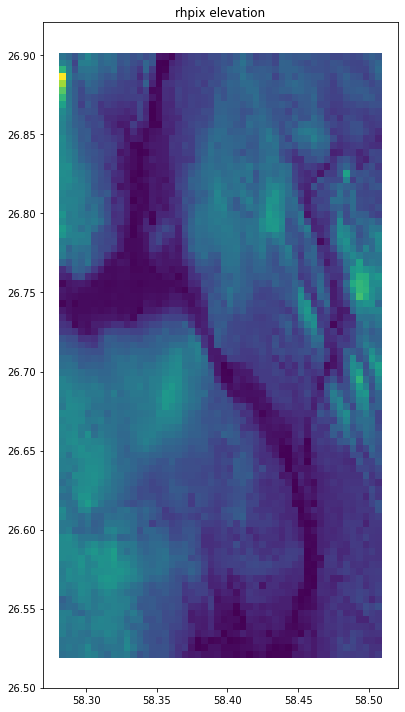

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
rhpix_el_11_geom.plot(column='elevation',ax=ax)
ax.set_title('rhpix elevation')
plt.tight_layout()